Tutorial 0: Visualization
=========================

In this tutorial, we'll cover visualization in **PyAutoLens** and make sure images display properly on your computer.

First, lets load an image of a (simulated) strong lens. Don't worry too much about what the code below is doing as it
will be covered in a later tutorial.

In [1]:
#%matplotlib inline

from os import path
import autolens as al
import autolens.plot as aplt

PyAutoLens assumes the working directory is `autolens_workspace/` on your hard-disk. This is so that it can:
 
 - Load configuration settings from config files in the `autolens_workspace/config` folder.
 - Load example data from the `autolens_workspace/dataset` folder.
 - Output the results of models fits to your hard-disk to the `autolens/output` folder. 
    
If you don't have an autolens_workspace (perhaps you cloned / forked the **PyAutoLens** GitHub repository?) you can
download it here:
 
 https://github.com/Jammy2211/autolens_workspace

At the top of every tutorial notebook, you'll see the following cell. This cell uses the project `pyprojroot` to
locate the path to the workspace on your computer and use it to set the working directory of the notebook.

In [2]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


If the printed working directory does not match the workspace path on your computer, you can manually set it
as follows (the example below shows the path I would use on my laptop. The code is commented out so you do not
use this path in this tutorial!

In [3]:
workspace_path = "/Users/Jammy/Code/PyAuto/autolens_workspace"
# #%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

Working Directory has been set to `/Users/Jammy/Code/PyAuto/autolens_workspace`


The `dataset_path` specifies where the dataset is located, which is the 
directory `autolens_workspace/dataset/imaging/no_lens_light/mass_sie__source_sersic`.

There are many example simulated images of strong lenses in this directory that will be used throughout the tutorials.

In [4]:
dataset_path = path.join(
    "dataset", "imaging", "no_lens_light", "mass_sie__source_sersic"
)

We now load this dataset from .fits files and create an instance of an `imaging` object.

In [5]:
imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    pixel_scales=0.1,
)

We can plot an image as follows:

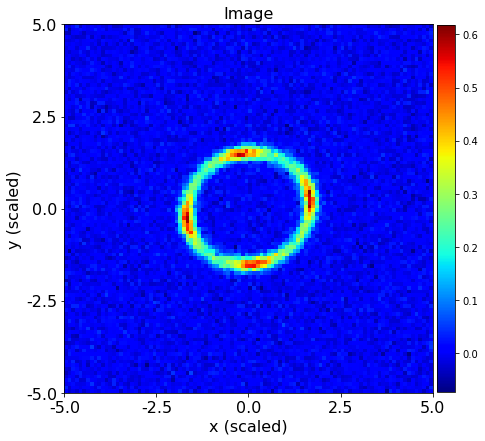

In [6]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

Does the figure display correctly on your computer screen? 

If not, you can customize a number of matplotlib setup options using a `MatPlot2D` object in **PyAutoLens**, which 
wraps the `matplotlib` methods used to display the image.

(For example, the `Figure` class wraps the `matplotlib` method `plt.figure(), whereas the `Yticks` class wraps
`plt.yticks`).

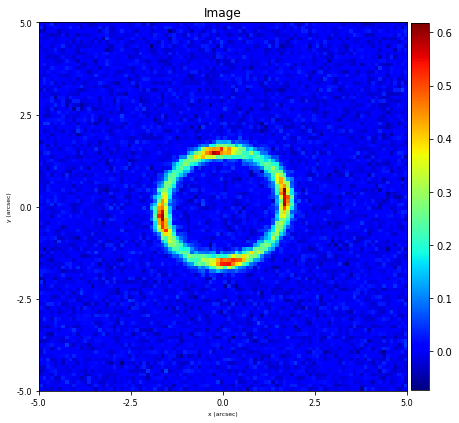

In [7]:
mat_plot_2d = aplt.MatPlot2D(
    figure=aplt.Figure(figsize=(7, 7)),
    yticks=aplt.YTicks(fontsize=8),
    xticks=aplt.XTicks(fontsize=8),
    title=aplt.Title(fontsize=12),
    ylabel=aplt.YLabel(fontsize=6),
    xlabel=aplt.XLabel(fontsize=6),
)

imaging_plotter = aplt.ImagingPlotter(imaging=imaging, mat_plot_2d=mat_plot_2d)
imaging_plotter.figures(image=True)

Many matplotlib options can be customized, but for now we're only concerned with making sure figures display cleanly in 
your Jupyter Notebooks. However, for future reference, a comprehensive API reference guide of all options and what 
`matplotlib` methods they wrap can be found in at`autolens_workspace/plot`. You should check this out once you are
more familiar with PyAutoLens.

Ideally, we wouldn't need to specify a new `MatPlot2D` object every time we plot an image we make, especially as 
you'll be  changing the same option to the same value over and over again (e.g. the figsize). Fortunately, the 
default values used by **PyAutoLens** can be fully customized.

Checkout the following files in `autolens_workspace/config/visualize/mat_wrap`:

All default matplotlib values used by **PyAutoLens** are here. There`s lots, so lets only focus on whats important for 
displaying figures correctly:

 - Figure.ini -> [figure] -> figsize
 - YLabel.ini -> [figure] -> fontsize
 - XLabel.ini -> [figure] -> fontsize
 - TickParams.ini -> [figure] -> labelsize
 - YTicks.ini -> [figure] -> labelsize
 - XTicks.ini -> [figure] -> labelsize

Don't worry about all the other files or options listed for now, as they`ll make a lot more sense once you are familiar 
with **PyAutoLens**.

(Note that you will need to reset your Jupyter notebook server for these changes to take effect, so make sure you 
have the right values using the `mat_plot_2d` object in the cell above beforehand!)

In addition to individual `figures` which use a `mat_plot_2d` to plot them, **PyAutoLens** also uses this object to 
plot `subplots`. 

Lets plot a subplot of our `Imaging` data:

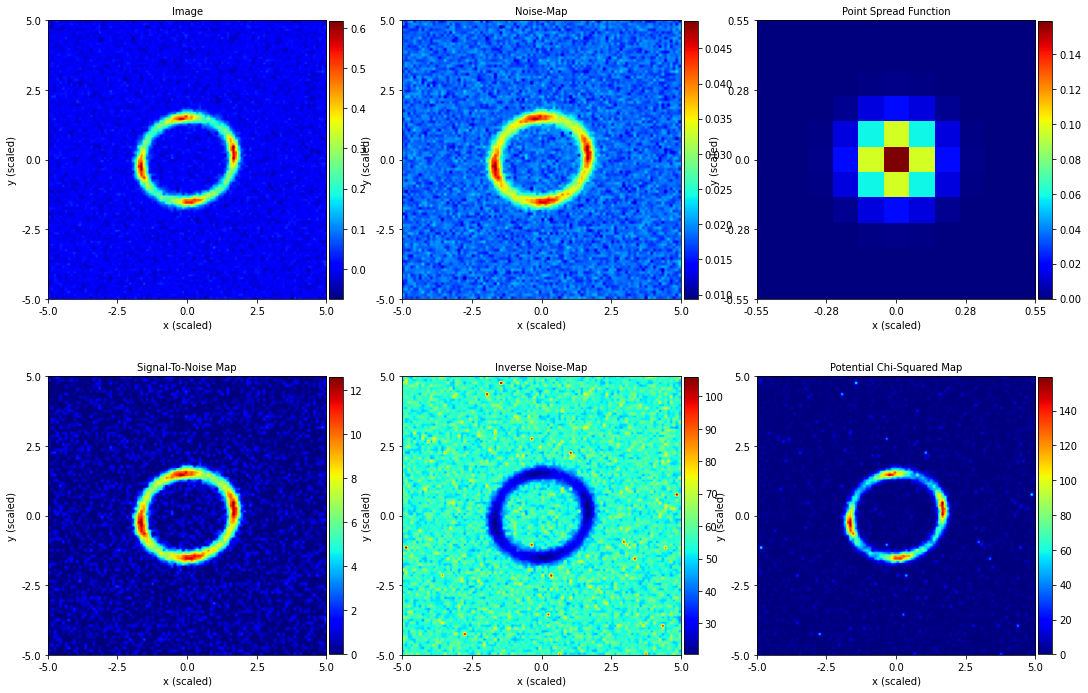

In [8]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.subplot_imaging()

Again, we can customize this using a `MatPlot2D`.

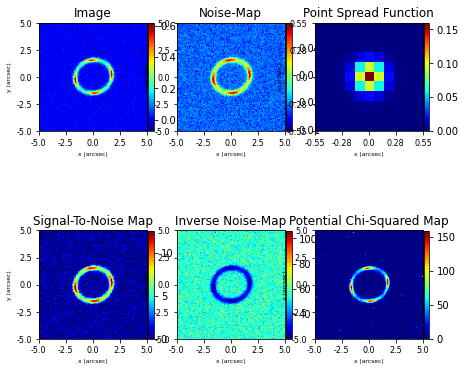

In [9]:
mat_plot_2d = aplt.MatPlot2D(
    figure=aplt.Figure(figsize=(7, 7)),
    yticks=aplt.YTicks(fontsize=8),
    xticks=aplt.XTicks(fontsize=8),
    title=aplt.Title(fontsize=12),
    ylabel=aplt.YLabel(fontsize=6),
    xlabel=aplt.XLabel(fontsize=6),
)

imaging_plotter = aplt.ImagingPlotter(imaging=imaging, mat_plot_2d=mat_plot_2d)
imaging_plotter.subplot_imaging()

Again, you can customize the default appearance of subplots by editing the config files above, but not editing the
corresponding entries under the [subplot] headers.

The other thing we can do with figures is choose what we include in the plot. For example, we can choose whether to 
include the origin of the coordinate system on our plot of the image:

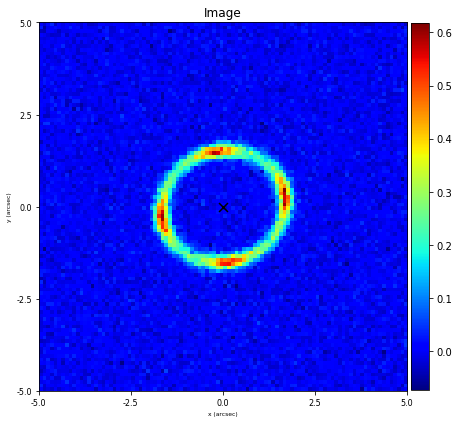

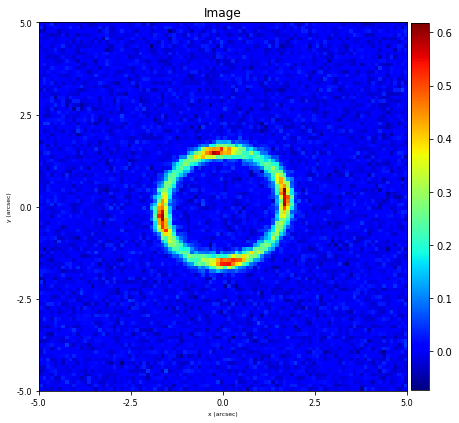

In [10]:
include_2d = aplt.Include2D(origin=True)
imaging_plotter = aplt.ImagingPlotter(
    imaging=imaging, mat_plot_2d=mat_plot_2d, include_2d=include_2d
)
imaging_plotter.figures(image=True)

include_2d = aplt.Include2D(origin=False)
imaging_plotter = aplt.ImagingPlotter(
    imaging=imaging, mat_plot_2d=mat_plot_2d, include_2d=include_2d
)
imaging_plotter.figures(image=True)

Throughout the **HowToLens** lecture series you'll see lots more objects that can be included on figures and subplots.

Just like the matplotlib setup, you can customize what does and does not appear on figures by default using the 
config file `autolens_workspace/config/visualize/include.ini`

Great! Hopefully, visualization in **PyAutoLens** is displaying nicely for us to get on with the **HowToLens** 
lecture series.